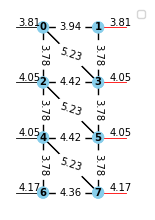

(0, 1, {'fault_ids': set(), 'weight': 3.9377826673290692, 'error_probability': 0.01911873511075362})


In [1]:
import stim
import pymatching

from soft_info import draw_matching_graph




DISTANCE = 3
ROUNDS = 3
noise_list = [1e-2, 1e-2, 1e-2, 1e-2]

circuit = stim.Circuit.generated("repetition_code:memory",
                                distance=DISTANCE,
                                rounds=ROUNDS,
                                after_clifford_depolarization=noise_list[0], #two-qubit-fidelity,
                                after_reset_flip_probability=noise_list[1], #reset error,
                                before_measure_flip_probability=noise_list[2], #measurement error,
                                before_round_data_depolarization=noise_list[3]) #idle error)


model = circuit.detector_error_model(decompose_errors=True)
matching = pymatching.Matching.from_detector_error_model(model)

draw_matching_graph(matching, DISTANCE, ROUNDS, scale_factor=0.6, figsize=(2,2))
print(matching.edges()[1])
p_before = matching.edges()[1][2]["error_probability"]

# NNN edge

[(0, None, {'fault_ids': set(), 'weight': 3.8089606069523247, 'error_probability': 0.021690311111111034}), (0, 1, {'fault_ids': set(), 'weight': 2.0377603116824514, 'error_probability': 0.1152949880886029}), (0, 2, {'fault_ids': set(), 'weight': 3.7775050259622516, 'error_probability': 0.02236793284649182}), (0, 3, {'fault_ids': set(), 'weight': 5.228431239083874, 'error_probability': 0.005333333333333313}), (1, 3, {'fault_ids': set(), 'weight': 3.7775050259622516, 'error_probability': 0.02236793284649182}), (1, None, {'fault_ids': {0}, 'weight': 3.8089606069523247, 'error_probability': 0.021690311111111034}), (2, None, {'fault_ids': set(), 'weight': 4.049349764267197, 'error_probability': 0.017134980740740654}), (2, 3, {'fault_ids': set(), 'weight': 4.416791574079476, 'error_probability': 0.01192888888888882}), (2, 4, {'fault_ids': set(), 'weight': 3.7775050259622516, 'error_probability': 0.02236793284649182}), (2, 5, {'fault_ids': set(), 'weight': 5.228431239083874, 'error_probabilit

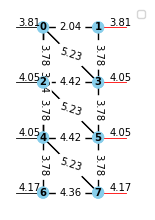

In [6]:
import numpy as np

matching.add_edge(0, 4, error_probability=p_before, weight=-np.log(p_before/(1-p_before)), merge_strategy="keep-original")
print(matching.edges())
draw_matching_graph(matching, DISTANCE, ROUNDS, scale_factor=0.6, figsize=(2,2))

# Merge strategy ``"independent"``

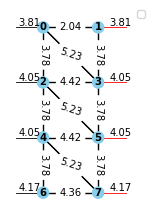

(0, 1, {'fault_ids': set(), 'weight': 2.0377603116824514, 'error_probability': 0.1152949880886029})
error probability p+p_before - 2*p*p_before:  0.1152949880886029


In [2]:
import numpy as np

p=0.1

matching.add_edge(0, 1, error_probability=p, weight=-np.log(p/(1-p)), merge_strategy="independent")

draw_matching_graph(matching, DISTANCE, ROUNDS, scale_factor=0.6, figsize=(2,2))
print(matching.edges()[1])
print("error probability p+p_before - 2*p*p_before: ", p+p_before-2*p*p_before)